# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import pandas as pd

if '../../../notebooks/' not in sys.path:
    sys.path.append('../../../notebooks/')

import utils.constants as cts

from models.oface_mouth_model import OpenfaceMouth
from data_loaders.data_loader import DLName
from gt_loaders.gt_names import GTName
from net_trainer import NetworkTrainer, BaseModel, Optimizer

# Start Network Trainer

In [3]:
kwargs = { 
    'use_neptune': True,
    'exp_params' : {
        'name': 'train_vgg16',
        'description': 'Training VGG16 with all data loaders',
        'tags': ['vgg16', 'data loaders'],
        'src_files': ['net_trainer.py']
    },
    'properties': {
        'tagger_model': OpenfaceMouth(),
        'dl_names': [DLName.VGGFACE2, DLName.CALTECH, DLName.FVC_PYBOSSA, 
                     DLName.CVL, DLName.FEI_DB, DLName.GEORGIA_TECH, DLName.COLOR_FERET,
                     DLName.ICPR04, DLName.IMFDB, DLName.IJBC, DLName.LFW, DLName.CASIA_WF,
                     DLName.GENKI4K_DB
                    ],
        'req': cts.ICAO_REQ.MOUTH,
        'aligned': True,
        'use_gt_data': False,
#         'gt_names': [GTName.GENKI, GTName.FVC],
        'balance_input_data': False,
    },
    'net_train_params': {
        'base_model': BaseModel.VGG16,
        'batch_size': 64,
        'n_epochs': 100,
        'early_stopping': 30,
        'shuffle': True,
        'dense_units': 128,
        'learning_rate': 1e-3,
        'optimizer': Optimizer.ADAM,
        'dropout': 0.5,
        'train_prop': 0.9,
        'validation_prop': 0.05,
        'test_prop': 0.05,
        'seed': 42,
        'validation_split': 0.1
    }
}

trainer = NetworkTrainer(**kwargs)

-----
Use Neptune:  True
-----
Args: 
{'exp_params': {'description': 'Training VGG16 with all data loaders',
                'name': 'train_vgg16',
                'src_files': ['net_trainer.py'],
                'tags': ['vgg16', 'data loaders']},
 'net_train_params': {'base_model': <BaseModel.VGG16: {'target_size': (224, 224), 'prep_function': <function preprocess_input at 0x7f384b88fd30>}>,
                      'batch_size': 64,
                      'dense_units': 128,
                      'dropout': 0.5,
                      'early_stopping': 30,
                      'learning_rate': 0.001,
                      'n_epochs': 100,
                      'optimizer': <Optimizer.ADAM: 'Adam'>,
                      'seed': 42,
                      'shuffle': True,
                      'test_prop': 0.05,
                      'train_prop': 0.9,
                      'validation_prop': 0.05,
                      'validation_split': 0.1},
 'properties': {'aligned': True,
          

# Load Data

In [4]:
trainer.load_training_data()

Loading data
..Ignoring 0 dummy and empty label values
..Ignoring 0 dummy and empty label values
..Ignoring 0 dummy and empty label values
..Ignoring 0 dummy and empty label values
..Ignoring 0 dummy and empty label values
..Ignoring 0 dummy and empty label values
..Ignoring 0 dummy and empty label values
..Ignoring 0 dummy and empty label values
..Ignoring 0 dummy and empty label values
..Ignoring 0 dummy and empty label values
..Ignoring 0 dummy and empty label values
..Ignoring 0 dummy and empty label values
..Ignoring 0 dummy and empty label values
Input data.shape: (181819, 4)
TrainData.shape: (181819, 4)
..Ignoring 0 dummy and empty label values
Input data.shape: (3554, 4)
TestData.shape: (3554, 4)
Data loaded


# Data Balancing

In [5]:
trainer.balance_input_data()

Not balancing input_data


# Data Generators

In [6]:
trainer.setup_data_generators()

Starting data generators
Found 163638 validated image filenames belonging to 2 classes.
Found 18181 validated image filenames belonging to 2 classes.
Found 3554 validated image filenames belonging to 2 classes.
TOTAL: 185373


# Use Neptune

In [7]:
trainer.start_neptune()
trainer.create_experiment()

Starting Neptune
Creating experiment
https://ui.neptune.ai/guilhermemg/icao-nets-training/e/IC-76


# Training Model

In [8]:
trainer.train_model()

Training VGG16 network
Epoch 1/100
2556/2556 [==============================] - 4423s 2s/step - loss: 0.6399 - accuracy: 0.6223 - val_loss: 0.5921 - val_accuracy: 0.7059
Epoch 2/100
2556/2556 [==============================] - 4814s 2s/step - loss: 0.6224 - accuracy: 0.6380 - val_loss: 0.6148 - val_accuracy: 0.6584
Epoch 3/100
2556/2556 [==============================] - 4575s 2s/step - loss: 0.6155 - accuracy: 0.6414 - val_loss: 0.5697 - val_accuracy: 0.7058
Epoch 4/100
2556/2556 [==============================] - 4407s 2s/step - loss: 0.6124 - accuracy: 0.6424 - val_loss: 0.5709 - val_accuracy: 0.7245
Epoch 5/100
2556/2556 [==============================] - 4397s 2s/step - loss: 0.6095 - accuracy: 0.6450 - val_loss: 0.5759 - val_accuracy: 0.6815
Epoch 6/100
2556/2556 [==============================] - 4382s 2s/step - loss: 0.6086 - accuracy: 0.6444 - val_loss: 0.5839 - val_accuracy: 0.7030
Epoch 7/100
2556/2556 [==============================] - 4335s 2s/step - loss: 0.6081 - accurac

KeyboardInterrupt: 

In [9]:
trainer.model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

# Plots

AttributeError: 'NetworkTrainer' object has no attribute 'H'

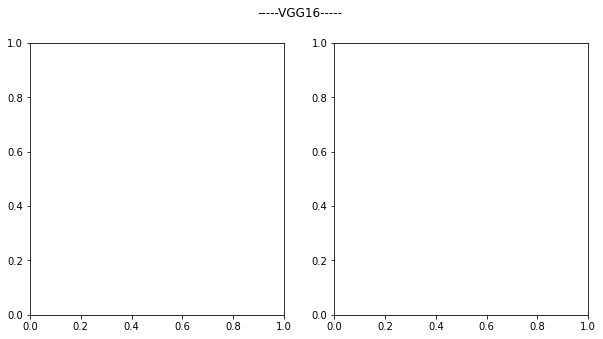

In [10]:
trainer.draw_training_history()

# Saving Trained Model

In [11]:
trainer.save_model()

Saving model


# Test Trained Model

In [12]:
trainer.test_model()

Testing Trained Model
              precision    recall  f1-score   support

    NON_COMP       0.76      0.87      0.81      1791
        COMP       0.85      0.72      0.78      1763

    accuracy                           0.80      3554
   macro avg       0.80      0.80      0.80      3554
weighted avg       0.80      0.80      0.80      3554

Model Accuracy: 0.7977


# Evaluate Model

In [13]:
trainer.evaluate_model()

Evaluating model
TEST loss:  0.5415
TEST accuracy:  0.7413


# Vizualize Model Classification

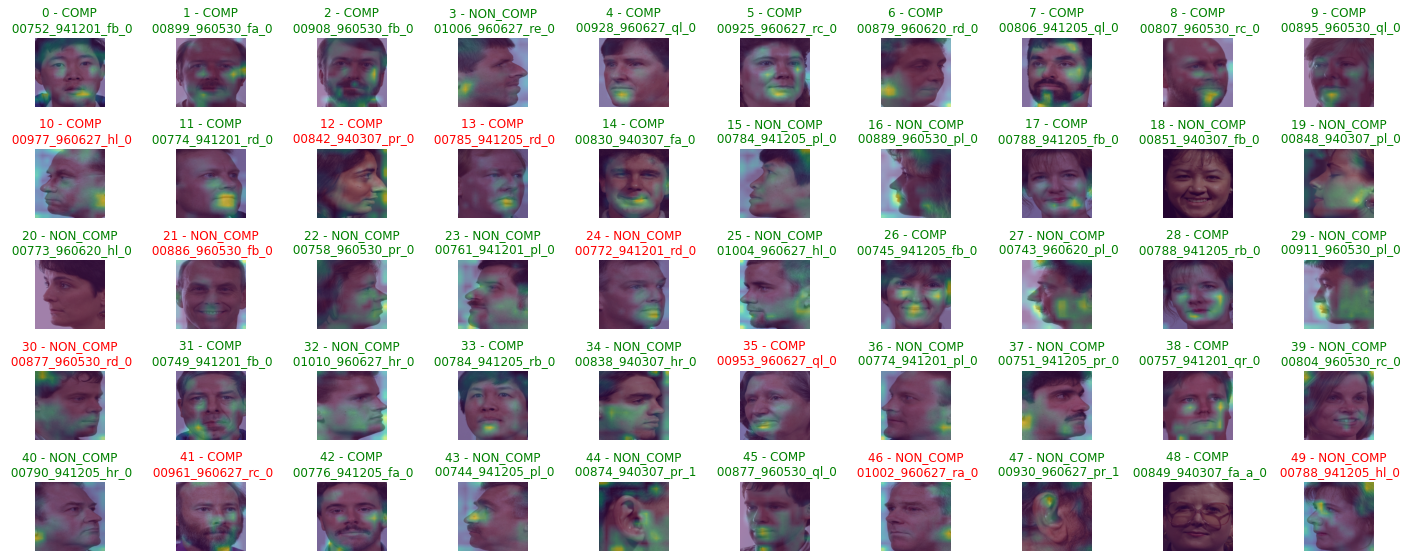

In [14]:
trainer.vizualize_predictions()

# Finishing Experiment Manager

In [15]:
trainer.finish_experiment()

Finishing Neptune
